In [1]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Very hacky, bad thing to do.
SRC_PATH = os.path.realpath('../src')
sys.path.append(SRC_PATH)

In [2]:
# Local imports.
from analysis import single_cycles
from defaults import PITCH_RATE, SAMPLE_RATE
from synthesis import EnvelopeMorpher, StimulusGenerator
from util import midi_to_hz, stft_plot

In [3]:
# Synthesis parameters.
num_partials = 70
midi_pitch = 48
fm_depth = 0.1314
f0 = midi_to_hz(midi_pitch)

In [4]:
# Load env as linear amplitude. (CheapTrick calculates the power spectrum.)
env = single_cycles[0]['env']
env = np.sqrt(env)

In [16]:
# Modify the spectral envelopes.

morpher = EnvelopeMorpher(env)
morpher.shuffle_phase(num_shifts=5)

# Check that the shuffler is working.
print(env - morpher())

[[ 0.00000000e+00  0.00000000e+00 -6.25639153e-02 ...  0.00000000e+00
   3.32403212e-05  4.82810240e-05]
 [ 0.00000000e+00  0.00000000e+00 -1.03578331e-01 ...  0.00000000e+00
  -5.71120112e-05  1.79858969e-05]
 [ 0.00000000e+00  0.00000000e+00 -1.41746061e-01 ...  0.00000000e+00
  -9.02921255e-05 -1.71979809e-05]
 ...
 [ 0.00000000e+00  0.00000000e+00 -1.04914890e-01 ...  0.00000000e+00
   1.08441693e-04  1.47793512e-04]
 [ 0.00000000e+00  0.00000000e+00 -1.08085359e-01 ...  0.00000000e+00
   1.19617715e-04  1.00188920e-04]
 [ 0.00000000e+00  0.00000000e+00 -9.23759269e-02 ...  0.00000000e+00
   2.71787100e-05 -1.49749941e-05]]


In [17]:
# Rock 'n' Roll.

generator = StimulusGenerator(sr=SAMPLE_RATE, pr=PITCH_RATE)
x = generator(
    f0=f0,
    fm_depth=fm_depth*0,
    env=morpher(),
    num_partials=70,
    length=2.,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
)

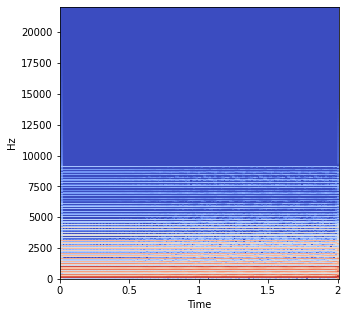

In [18]:
stft_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))